# Biostatistics - Week 4

Control for confounding variables relevant to the experiment - paired Dataset 

Preference for paired datasets 


# 7th February 2023

In [1]:
#install.packages("gapminder")
#load the installed package
library(gapminder)
str(gapminder_unfiltered)
str(gapminder)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'gapminder' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Warning message:
"package 'gapminder' was built under R version 3.6.3"

Classes 'tbl_df', 'tbl' and 'data.frame':	3313 obs. of  6 variables:
 $ country  : Factor w/ 187 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 6 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num  28.8 30.3 32 34 36.1 ...
 $ pop      : int  8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num  779 821 853 836 740 ...
Classes 'tbl_df', 'tbl' and 'data.frame':	1704 obs. of  6 variables:
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num  28.8 30.3 32 34 36.1 ...
 $ pop      : int  8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num  779 821 853 836 740 ...


In [2]:
setwd("C:/Users/VATSALA NEMA/Documents/SEM 8/Biostatistics")#But this will work


In [3]:
summary(gapminder_unfiltered)
#plot(gapminder_unfiltered)

           country        continent         year         lifeExp     
 Czech Republic:  58   Africa  : 637   Min.   :1950   Min.   :23.60  
 Denmark       :  58   Americas: 470   1st Qu.:1967   1st Qu.:58.33  
 Finland       :  58   Asia    : 578   Median :1982   Median :69.61  
 Iceland       :  58   Europe  :1302   Mean   :1980   Mean   :65.24  
 Japan         :  58   FSU     : 139   3rd Qu.:1996   3rd Qu.:73.66  
 Netherlands   :  58   Oceania : 187   Max.   :2007   Max.   :82.67  
 (Other)       :2965                                                 
      pop              gdpPercap       
 Min.   :5.941e+04   Min.   :   241.2  
 1st Qu.:2.680e+06   1st Qu.:  2505.3  
 Median :7.560e+06   Median :  7825.8  
 Mean   :3.177e+07   Mean   : 11313.8  
 3rd Qu.:1.961e+07   3rd Qu.: 17355.8  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

In [5]:
install.packages("Hmisc")
#load the installed package
library(Hmisc)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'Hmisc' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"

ERROR: Error in library(Hmisc): there is no package called 'Hmisc'


In [ ]:
#as.data.frame(unlist(strsplit(unique())))

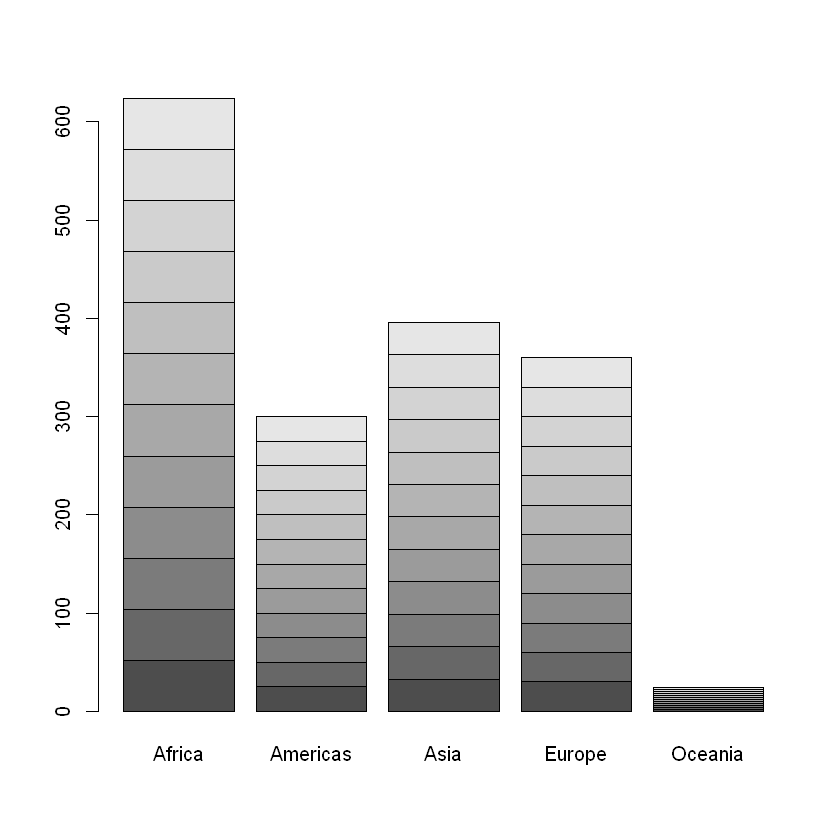

In [6]:
table(gapminder$year, gapminder$continent)-> crossTab
barplot(crossTab)

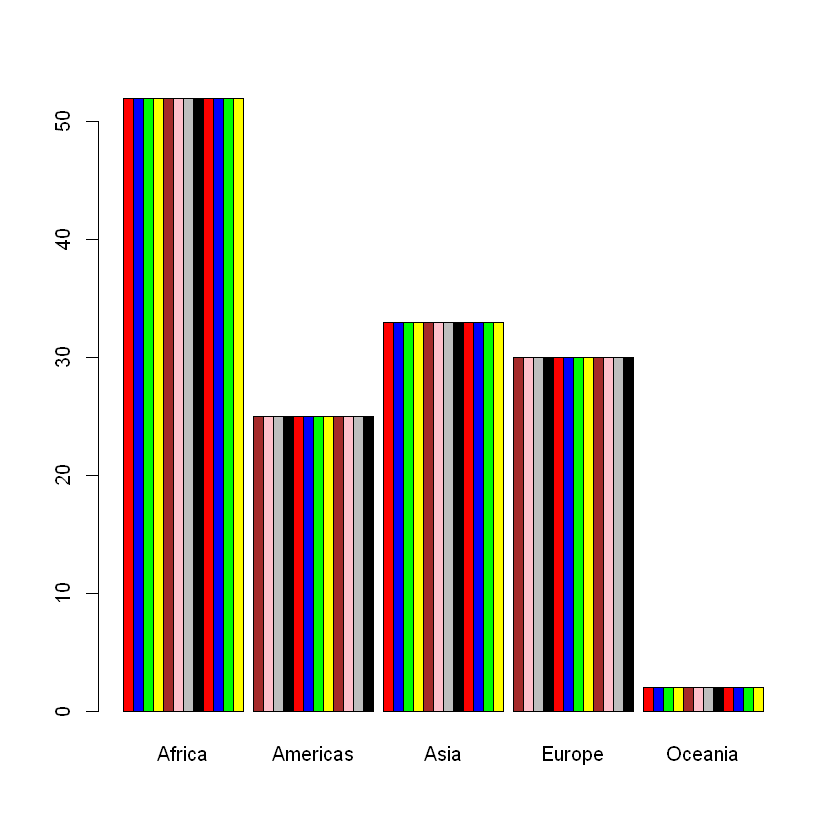

In [7]:
barplot(crossTab,beside=TRUE,col=c("red","blue","green","yellow",
                                   "brown","pink","grey","black"))


In [8]:
# Why is it bad to perform too many tests?
# The p-value turns to creep into the significant value 
# ANOVA, Kruskals test, and - midsem 

In [ ]:
#comparing more than 2 vectors ----
x = rnorm(10,sd=100,mean=5)
y = rnorm(10,sd=10,mean=6)
z = rnorm(10,sd=10,mean=7)

data.frame(values=c(x,y,z)
           ,variable=c(rep("x",length(x)),rep("y",length(y)),
                       rep("z",length(z))))->xyzBox


In [ ]:
boxplot(xyzBox$values~xyzBox$variable)

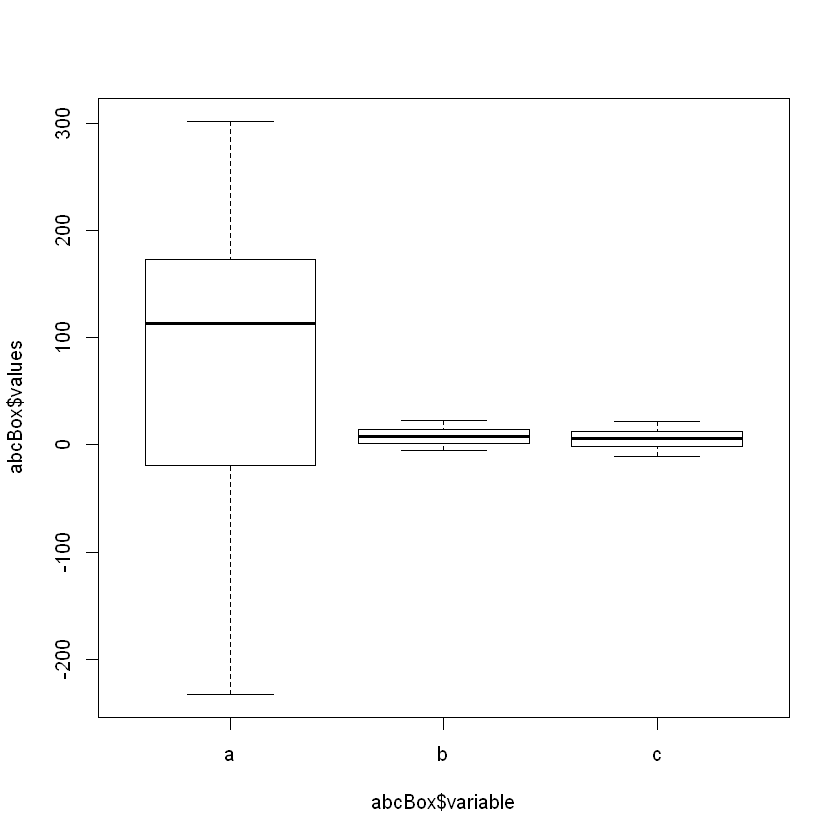

In [33]:
a = rnorm(10,sd=100,mean=50)
b = rnorm(10,sd=10,mean=6)
c = rnorm(10,sd=10,mean=7)

data.frame(values=c(a,b,c)
           ,variable=c(rep("a",length(a)),rep("b",length(b)),
                       rep("c",length(c))))->abcBox

boxplot(abcBox$values~abcBox$variable)

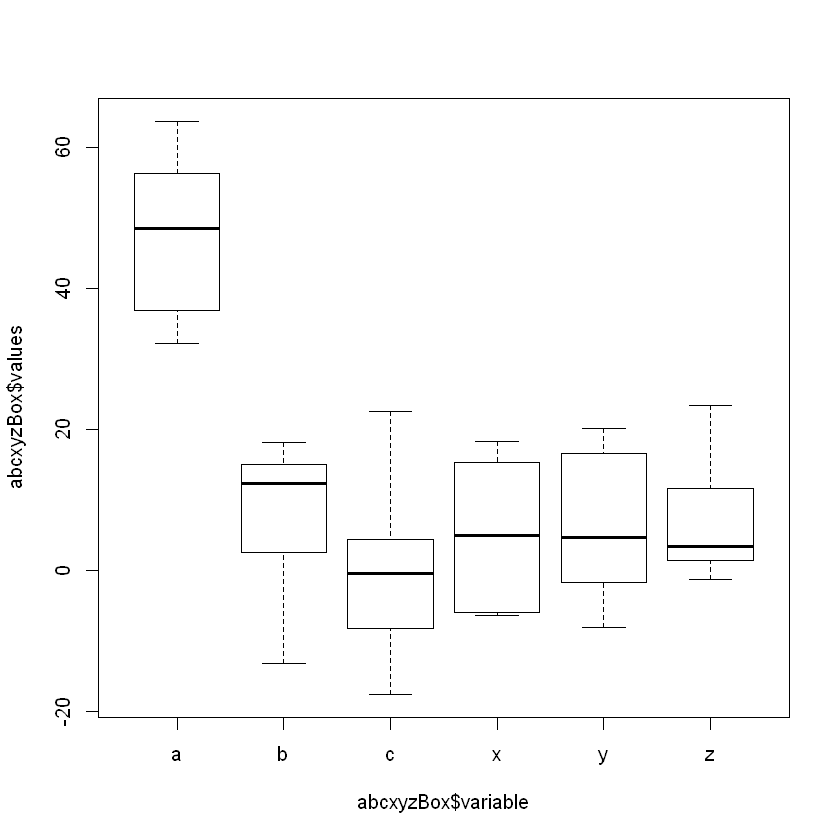

In [12]:
#rbind will append the rows
rbind(abcBox,xyzBox)->abcxyzBox
boxplot(abcxyzBox$values~abcxyzBox$variable)

In [23]:
#One way ANOVA
res.aov1 <- aov(values ~ variable, data=abcxyzBox)
#Null hypothesis: All groups have same mean
res.aov


Call:
   aov(formula = values ~ variable, data = abcxyzBox)

Terms:
                 variable Residuals
Sum of Squares  15752.740  5310.801
Deg. of Freedom         5        54

Residual standard error: 9.917064
Estimated effects may be unbalanced

In [18]:
summary(res.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
variable     5  15753  3150.5   32.03 5.19e-15 ***
Residuals   54   5311    98.3                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [19]:
#Alternative hypothesis:All groups don't have the same mean

res.aov2 <- aov(values ~ variable, data = xyzBox)
res.aov


Call:
   aov(formula = values ~ variable, data = xyzBox)

Terms:
                 variable Residuals
Sum of Squares     2.2939 2227.2473
Deg. of Freedom         2        27

Residual standard error: 9.082436
Estimated effects may be unbalanced

In [20]:
summary(res.aov)


            Df Sum Sq Mean Sq F value Pr(>F)
variable     2    2.3    1.15   0.014  0.986
Residuals   27 2227.2   82.49               

In [26]:
res.aov0<- aov(values ~ variable, data=abcBox)
TukeyHSD(res.aov0) # for multiple testing correction p value is adjusted

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = values ~ variable, data = abcBox)

$variable
          diff       lwr        upr    p adj
b-a -39.563739 -51.41347 -27.714007 0.000000
c-a -48.746947 -60.59668 -36.897214 0.000000
c-b  -9.183208 -21.03294   2.666525 0.152033


In [ ]:
#Quantile -Quantile Plot

#Homogeneity of variances: Data from multiple groups have the same 

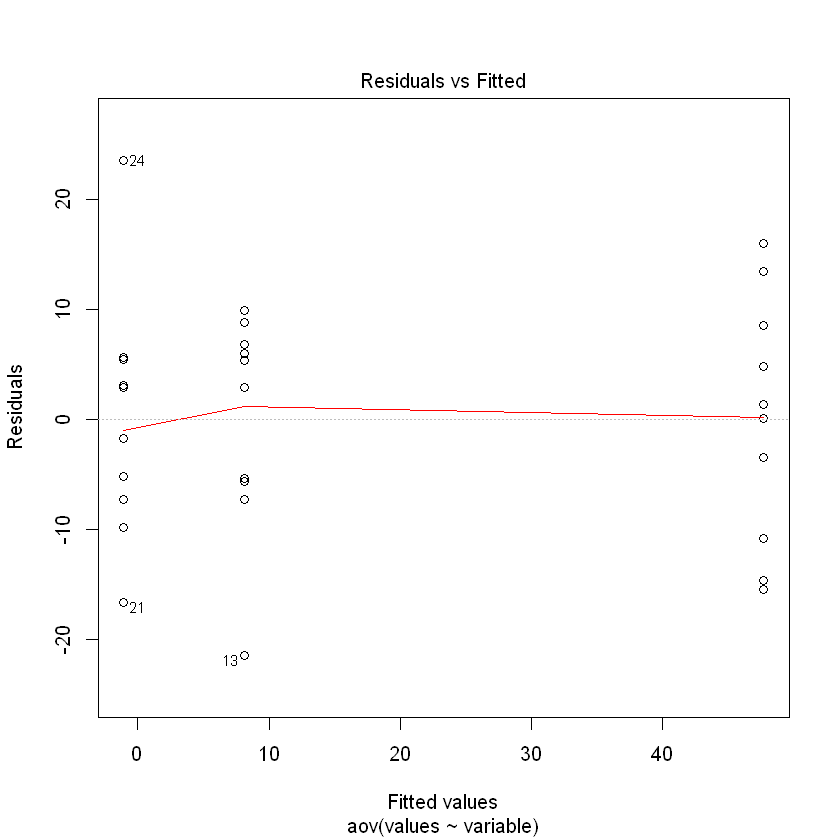

In [27]:
plot(res.aov0, 1)

In [32]:
install.packages("car")
library(car)

Warning message:
"dependency 'pbkrtest' is not available"also installing the dependencies 'processx', 'diffobj', 'brio', 'callr', 'cli', 'lifecycle', 'pkgload', 'ps', 'rlang', 'waldo', 'Matrix', 'testthat', 'MatrixModels', 'minqa', 'nloptr', 'RcppEigen', 'quantreg', 'lme4'




  There are binary versions available but the source versions are later:
                binary    source needs_compilation
processx         3.5.2     3.8.0              TRUE
diffobj          0.3.4     0.3.5              TRUE
brio             1.1.2     1.1.3              TRUE
callr            3.7.0     3.7.3             FALSE
cli              2.5.0     3.6.0              TRUE
lifecycle        1.0.0     1.0.3             FALSE
pkgload          1.2.1     1.3.2             FALSE
ps               1.6.0     1.7.2              TRUE
rlang           0.4.11     1.0.6              TRUE
waldo            0.2.5     0.4.0             FALSE
Matrix           1.3-3     1.5-3              TRUE
testthat         3.0.2     3.1.6              TRUE
MatrixModels     0.5-0     0.5-1             FALSE
minqa            1.2.4     1.2.5              TRUE
nloptr         1.2.2.2     2.0.3              TRUE
RcppEigen    0.3.3.9.1 0.3.3.9.3              TRUE
quantreg          5.85      5.94              TRUE
lme4    

installing the source packages 'processx', 'diffobj', 'brio', 'callr', 'cli', 'lifecycle', 'pkgload', 'ps', 'rlang', 'waldo', 'Matrix', 'testthat', 'MatrixModels', 'minqa', 'nloptr', 'RcppEigen', 'quantreg', 'lme4', 'car'

Warning message in install.packages("car"):
"installation of package 'diffobj' had non-zero exit status"Warning message in install.packages("car"):
"installation of package 'brio' had non-zero exit status"Warning message in install.packages("car"):
"installation of package 'cli' had non-zero exit status"Warning message in install.packages("car"):
"installation of package 'ps' had non-zero exit status"Warning message in install.packages("car"):
"installation of package 'rlang' had non-zero exit status"Warning message in install.packages("car"):
"installation of package 'Matrix' had non-zero exit status"Warning message in install.packages("car"):
"installation of package 'minqa' had non-zero exit status"Warning message in install.packages("car"):
"installation of packa

ERROR: Error in library(car): there is no package called 'car'


In [30]:
#leveneTest(values~variable, data=abcBox) #to see if the variances are equal 

ERROR: Error in leveneTest(values ~ variable, data = abcBox): could not find function "leveneTest"


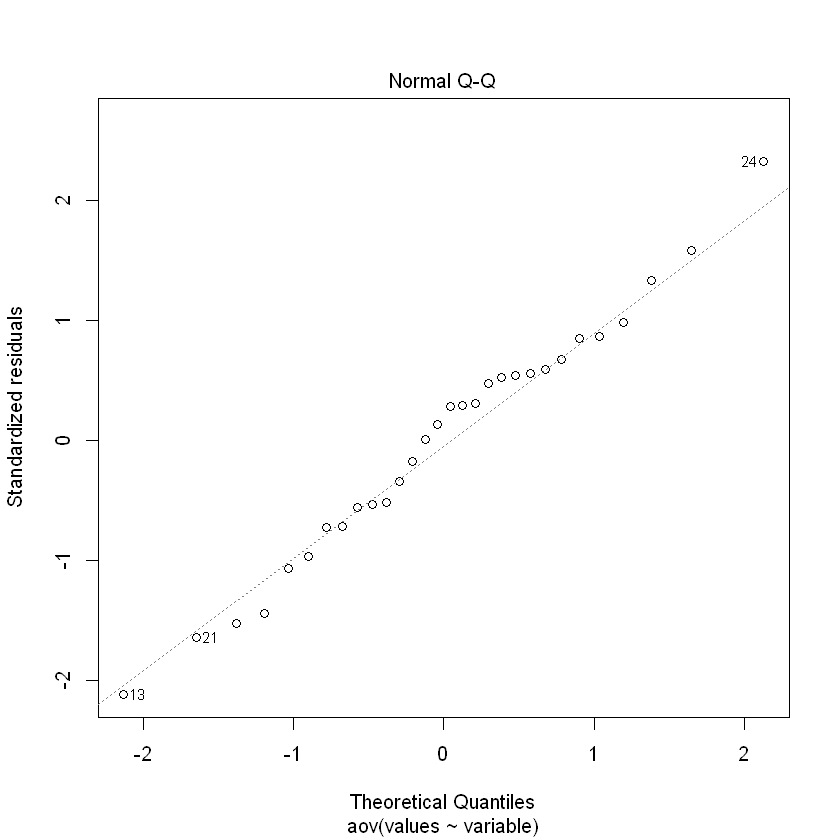

In [35]:
plot(res.aov0, 2)

In [37]:
#qqplot(values ~ variable, data=abcBox)

Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'language'"

ERROR: Error in sort(y): argument "y" is missing, with no default


In [ ]:
#Non parametric equivalent of ANOVA -kruskals value test 

# Week 5 | 16th February 2023

***Midsem imp stuff***

ANOVA (Parametric)
1. Continuous 
2. Categorical 

Post hoc test: 
1. Tukey HSD
2. Pair t-test 

Non parametric - Kruskal walis test **Question**
1. Pair wilcox - for each pair of categorical variables
2. Dunn test 
3. PMCMR
4. Conover 

Correction tests: 
**Question**
1. FDR
2. Bonferroni 
3. Holm 
4. bh 




In [1]:
install.packages("dunn.test")

package 'dunn.test' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\VATSALA NEMA\AppData\Local\Temp\RtmpKINVD1\downloaded_packages


In [2]:
library(dunn.test)

In [3]:
#Pairwise multiple comparision of mean ranks (PMCMR)

install.packages("PMCMRplus")
library(PMCMRplus)

also installing the dependencies 'fastmap', 'rlang', 'cachem', 'memoise', 'mvtnorm', 'multcompView', 'gmp', 'Rmpfr', 'SuppDists', 'kSamples', 'BWStest'




  There are binary versions available but the source versions are later:
           binary  source needs_compilation
rlang      0.4.11   1.0.6              TRUE
cachem      1.0.4   1.0.6              TRUE
memoise     2.0.0   2.0.1             FALSE
mvtnorm     1.1-1   1.1-3              TRUE
gmp         0.6-2   0.7-1              TRUE
Rmpfr       0.8-1   0.9-1              TRUE
SuppDists 1.1-9.5 1.1-9.7              TRUE
PMCMRplus   1.9.0   1.9.6              TRUE

package 'fastmap' successfully unpacked and MD5 sums checked
package 'multcompView' successfully unpacked and MD5 sums checked
package 'kSamples' successfully unpacked and MD5 sums checked
package 'BWStest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\VATSALA NEMA\AppData\Local\Temp\RtmpKINVD1\downloaded_packages


installing the source packages 'rlang', 'cachem', 'memoise', 'mvtnorm', 'gmp', 'Rmpfr', 'SuppDists', 'PMCMRplus'

Warning message in install.packages("PMCMRplus"):
"installation of package 'rlang' had non-zero exit status"Warning message in install.packages("PMCMRplus"):
"installation of package 'mvtnorm' had non-zero exit status"Warning message in install.packages("PMCMRplus"):
"installation of package 'gmp' had non-zero exit status"Warning message in install.packages("PMCMRplus"):
"installation of package 'SuppDists' had non-zero exit status"Warning message in install.packages("PMCMRplus"):
"installation of package 'cachem' had non-zero exit status"Warning message in install.packages("PMCMRplus"):
"installation of package 'Rmpfr' had non-zero exit status"Warning message in install.packages("PMCMRplus"):
"installation of package 'memoise' had non-zero exit status"Warning message in install.packages("PMCMRplus"):
"installation of package 'PMCMRplus' had non-zero exit status"

ERROR: Error in library(PMCMRplus): there is no package called 'PMCMRplus'


In [ ]:
#Conover-Iman test of multiple comparisions using rank sums, p-values 
#F-test(var.test used for checking whether variances are equal)

## **Linear Regression** ##
<br />
y=mx+c
<br />
Intercept: H0=>c=0
<br />
For slope: H-0: m=0



In [4]:
LunchAmount<-c(300, 154, 72, 899,1234, 36, 764, 321, 540, 684)
TipAmount<-c(30, 15, 7, 89, 123, 3, 76, 32, 54, 68)


In [7]:
reg_model<-lm(TipAmount~LunchAmount)

integer(0)

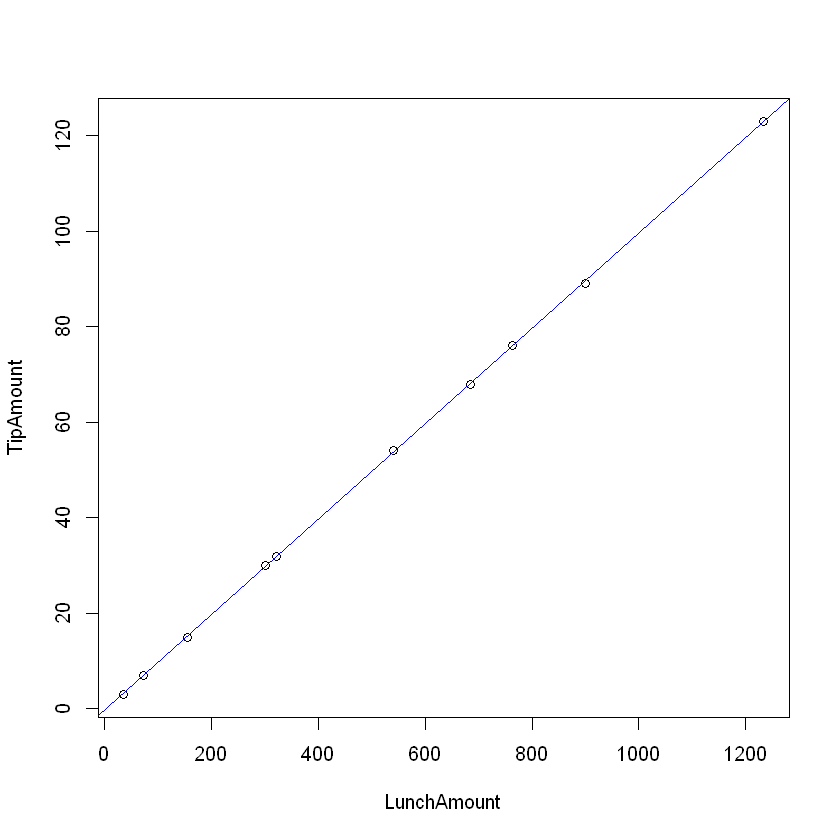

In [16]:
plot(TipAmount~LunchAmount, data=faithful) + abline(lm(TipAmount~LunchAmount, data=faithful), col="blue")

In [17]:
summary(reg_model)


Call:
lm(formula = TipAmount ~ LunchAmount)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47125 -0.10763  0.02165  0.17588  0.34882 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.2285817  0.1489946  -1.534    0.164    
LunchAmount  0.0997773  0.0002387 418.067   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2817 on 8 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:  0.9999 
F-statistic: 1.748e+05 on 1 and 8 DF,  p-value: < 2.2e-16


In [ ]:
a<-data.frame(newdata=394)

In [ ]:
RestaurantClass<_c(2, 1, 1, 3, 4, 1, 2, 1, 2, 2)
reg_model2 <- lm(TipAmount~LunchAmount+RestaurantClass)
abline()

In [ ]:
reg_model3<-lm(TipAmount~LunchAmount*RestaurantClass) #m1*m2=0 

In [ ]:
#AIC - Akaike information criterion
AIC(reg_model1)
AIC(reg_model2)
AIC(reg_model3)